In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import fitz
from config import temppath, outputpath

def pdf_to_np(file_path):
    image_arrays = []
    pdf_document = fitz.open(file_path)

    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        zoom_matrix = fitz.Matrix(3.0, 3.0)
        pix = page.get_pixmap(matrix=zoom_matrix)
        channels = pix.n
        image_array = np.frombuffer(pix.samples, dtype=np.uint8).reshape((pix.height, pix.width, channels))
        image_arrays.append(image_array)

    return image_arrays

In [2]:
img1 = pdf_to_np(f"{temppath}Model Performance Comparison (Prediction Model).pdf")[0]
img2 = pdf_to_np(f"{temppath}Performance on Different Rarity (Prediction Model).pdf")[0]
img3 = pdf_to_np(f"{temppath}Performance Comparison: Single and Full Types of Diseases (Prediction Model).pdf")[0]
img4 = pdf_to_np(f"{temppath}Model Performance Comparison (Survival Model).pdf")[0]
img5 = pdf_to_np(f"{temppath}Performance on Different Rarity (Survival Model).pdf")[0]
img6 = pdf_to_np(f"{temppath}Performance Comparison: Single and Full Types of Diseases (Survival Model).pdf")[0]

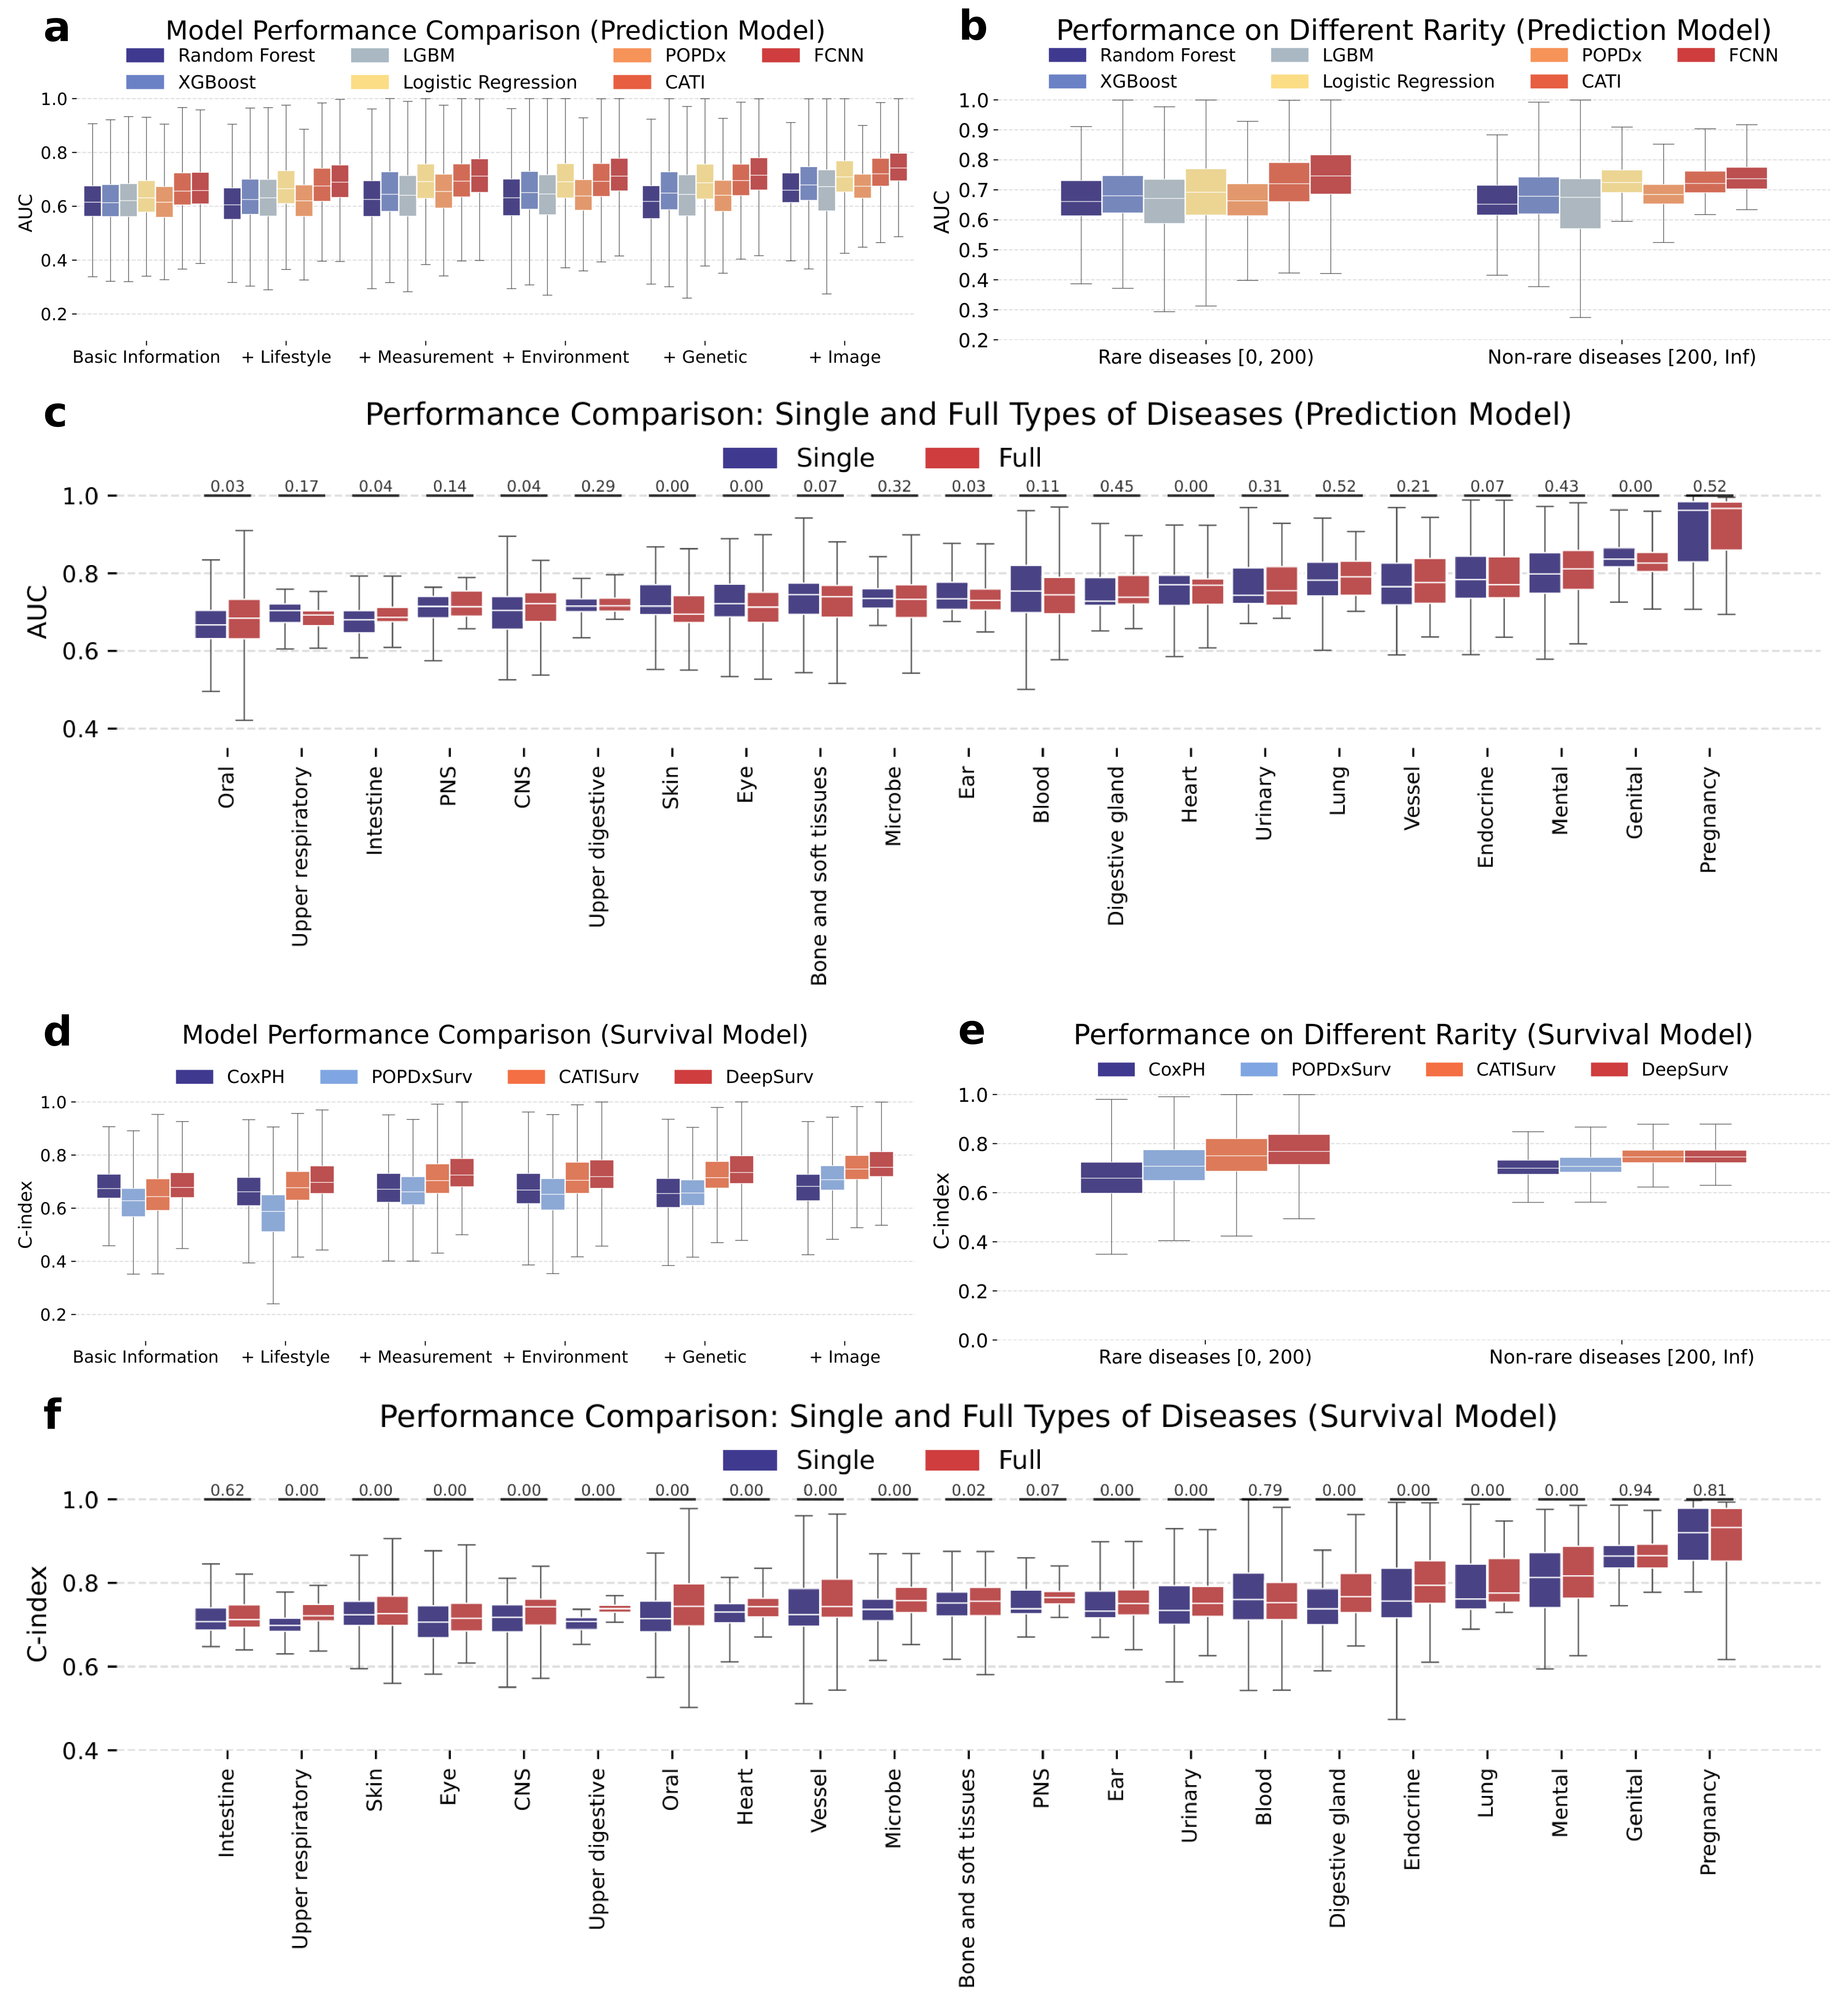

In [3]:
fig = plt.figure(figsize=(28, 35), dpi=300)
gs0 = gridspec.GridSpec(4, 2, figure=fig, height_ratios=[1,1.7,1,1.7], wspace=0, hspace=-0.35)
ax1 = fig.add_subplot(gs0[0, 0])
ax1.imshow(img1)
ax1.text(80,70,"a",fontsize=35, fontweight=600)
ax1.axis("off")
ax2 = fig.add_subplot(gs0[0, 1])
ax2.imshow(img2)
ax2.text(80,70,"b",fontsize=35, fontweight=600)
ax2.axis("off")
ax3 = fig.add_subplot(gs0[1, :])
ax3.imshow(img3)
ax3.text(40,50,"c",fontsize=35, fontweight=600)
ax3.axis("off")
ax4 = fig.add_subplot(gs0[2, 0])
ax4.imshow(img4)
ax4.text(80,70,"d",fontsize=35, fontweight=600)
ax4.axis("off")
ax5 = fig.add_subplot(gs0[2, 1])
ax5.imshow(img5)
ax5.text(80,70,"e",fontsize=35, fontweight=600)
ax5.axis("off")
ax6 = fig.add_subplot(gs0[3, :])
ax6.imshow(img6)
ax6.text(40,50,"f",fontsize=35, fontweight=600)
ax6.axis("off")
plt.savefig(f"{outputpath}fig2_model_performance.pdf",format="pdf",bbox_inches="tight")
plt.show()